In [1]:
import sys
sys.path.append('/home/cadeniran/u1/amphiscan-64prot')

In [33]:
import argparse
import re
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pyrosetta import * 
from modules import analyze_y
from modules import sns_heatmap
from modules import AH_CA_rmsd
from modules import HelixTools

In [3]:
init()

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python311.ubuntu 2024.39+release.59628fbc5bc09f1221e1642f1f8d157ce49b1410 2024-09-23T07:49:48] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python311.ubuntu r387 2024.39+release.59628fbc5b 59628fbc5b

In [75]:
plt.rcParams['figure.figsize'] = 17,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
np.set_printoptions(legacy='1.25')

In [5]:
os.chdir('/home/cadeniran/u1/amphiscan-64prot')
proteinlist=[]
path='/home/cadeniran/u1/amphiscan-64prot/input_pdbs/'
proteinlist = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
proteinlist.sort()

In [27]:
depthlist, rmsdlist, tiltlist, scorelist = [], [], [], []


for j in proteinlist:
    protein = j
    protein_tag = protein.split(sep='_')[0]
    multiple_tag = protein.split(sep='_')[1]

    native = pose_from_pdb('input_pdbs/{}_{}_renum.pdb'.format(protein_tag,multiple_tag))
    best = pose_from_pdb('results/{}_{}/output_pdbs/{}_{}_renum_best_pose_overall.pdb'.format(protein_tag,multiple_tag,protein_tag,multiple_tag))

    ### DEPTH CALC
    regexp = re.compile(r'The best depth.*?([0-9.-]+)')
    with open('results/{}_{}/txt/{}_{}_renum_best_scores.txt'.format(protein_tag,multiple_tag,protein_tag,multiple_tag)) as f:
        for line in f:
            match = regexp.match(line)
            if match:
                lastCol = line.split(sep=' ')[-1]
                depthlist.append(match.group(1))
                scorelist.append(lastCol.strip())


    ### RMSD CALC
    regexp = re.compile(r'The RMSD is.*?([0-9.-]+)')
    with open('results/{}_{}/txt/rmsd.txt'.format(protein_tag,multiple_tag)) as f:
        for line in f:
            match = regexp.match(line)
            if match:
                #print(match.group(1))
                rmsdlist.append(match.group(1))


    ### TILT CALC
    v1 = HelixTools().calculate_screw_axis(best)
    bestdegree = HelixTools().calc_angle(v1, 'z')

    v11 = HelixTools().calculate_screw_axis(native)
    nativedegree = HelixTools().calc_angle(v11, 'z')

    diff = bestdegree - nativedegree
    tiltlist.append(diff)

core.import_pose.import_pose: File 'input_pdbs/1eaz_A_renum.pdb' automatically determined to be of type PDB
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CD  in residue 35 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CE  in residue 35 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  NZ  in residue 35 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CD  in residue 58 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CE  in residue 58 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING 

core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  C   in residue 50 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  O   in residue 50 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CB  in residue 50 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  N   in residue 51 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CA  in residue 51 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  C   in residue 51 A.  Pass flag -ignore_zero_occupancy false to change this b

core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CE  in residue 5 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  NZ  in residue 5 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CD1 in residue 7 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CD2 in residue 7 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CG  in residue 8 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CD  in residue 8 A.  Pass flag -ignore_zero_occupancy false to change this behavio

core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CD1 in residue 139 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CA  in residue 141 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CB  in residue 141 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CG  in residue 141 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  ND1 in residue 141 A.  Pass flag -ignore_zero_occupancy false to change this behavior
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] PDB reader is ignoring atom  CD2 in residue 141 A.  Pass flag -ignore_zero_occupancy false to change 

core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 81
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG1 on residue VAL 84
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG2 on residue VAL 84
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG1 on residue VAL 85
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG2 on residue VAL 85
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue GLU 114
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLU 114
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLU 114
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU 114
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 121
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 121
core.conformation.Conformation: [ WARNING ] miss

core.conformation.Conformation: [ WARNING ] missing heavyatom:  NH1 on residue ARG 184
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NH2 on residue ARG 184
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue GLU 187
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLU 187
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLU 187
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU 187
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ARG 189
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue ARG 189
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE  on residue ARG 189
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ  on residue ARG 189
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NH1 on residue ARG 189
core.conformation.Conformation: [ WARNING ]

core.conformation.Conformation: Found disulfide between residues 43 95
core.conformation.Conformation: Found disulfide between residues 49 121
core.conformation.Conformation: Found disulfide between residues 50 88
core.conformation.Conformation: Found disulfide between residues 57 81
core.conformation.Conformation: Found disulfide between residues 75 86
core.import_pose.import_pose: File 'input_pdbs/2pxx_A_renum.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE  on residue ARG 5
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ  on residue ARG 5
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NH1 on residue ARG 5
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NH2 on residue ARG 5
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue ARG 33
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE  on residue ARG 33
core.conformation.Confor

core.pack.pack_missing_sidechains: packing residue number 46 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 107 because of missing atom number 7 atom name  CD
core.pack.pack_missing_sidechains: packing residue number 110 because of missing atom number 7 atom name  CD
core.pack.task: Packer task: initialize from command line()
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.pack.pack_rotamers: built 99 rotamers at 6 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
core.import_pose.import_pose: File 'results/2x18_A/output_pdbs/2x18_A_renum_best_pose_overall.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'input_pdbs/3elo_A_renum.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 18 84
core.conformation.Conformation: Found disulfide between residues 34 131
core.confor

core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE2 on residue GLN 264
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LEU 345
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue LEU 345
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue LEU 345
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue TRP 348
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue TRP 348
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue TRP 348
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE1 on residue TRP 348
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE2 on residue TRP 348
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE3 on residue TRP 348
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ2 on residue TRP 348
core.conformation.Conformation: [ WARNING ]

core.conformation.Conformation: Found disulfide between residues 71 152
core.conformation.Conformation: Found disulfide between residues 245 248
core.import_pose.import_pose: File 'input_pdbs/3ze5_A_renum.pdb' automatically determined to be of type PDB
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] discarding 1 atoms at position 115 in file input_pdbs/3ze5_A_renum.pdb. Best match rsd_type:  GLY
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] discarding 1 atoms at position 231 in file input_pdbs/3ze5_A_renum.pdb. Best match rsd_type:  GLY
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue HIS:CtermProteinFull 335
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] can't find pose atom for file-residue 115 atom  OXT (trying to store temperature in PDBInfo)
core.io.pose_from_sfr.PoseFromSFRBuilder: [ WARNING ] can't find pose atom for file-residue 231 atom  OXT (trying to store temperature in PDBInfo)
core.import_pose.import_pose: File 'results/3

core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 296
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 296
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 318
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LYS:CtermProteinFull 324
core.pack.pack_missing_sidechains: packing residue number 2 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 12 because of missing atom number 9 atom name  NZ
core.pack.pack_missing_sidechains: packing residue number 22 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 24 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 29 because of missing atom number 8 atom name  OE1
core.pack.pack_missing_sidechains: packing residue number 32 because of missing atom number 6 a

core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue GLU 241
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLU 241
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLU 241
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU 241
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue PHE 242
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue PHE 242
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue PHE 242
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE1 on residue PHE 242
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE2 on residue PHE 242
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ  on residue PHE 242
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LEU 245
core.conformation.Conformation: [ WARNING ]

core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue LEU 116
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LEU 117
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue LEU 117
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue LEU 117
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG1 on residue ILE 139
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG2 on residue ILE 139
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue ILE 139
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 141
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 141
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 141
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 141
core.conformation.Conformation: [ WARNING ]

core.pack.pack_missing_sidechains: packing residue number 258 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 264 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 265 because of missing atom number 6 atom name  CG1
core.pack.pack_missing_sidechains: packing residue number 267 because of missing atom number 7 atom name  CG
core.pack.task: Packer task: initialize from command line()
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.pack.pack_rotamers: built 302 rotamers at 25 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
core.import_pose.import_pose: File 'results/4ntj_A/output_pdbs/4ntj_A_renum_best_pose_overall.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 2 225
core.import_pose.import_pose: File 'input_pdbs/4rws_A_renum.pdb' automatically

core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue MET 92
core.conformation.Conformation: [ WARNING ] missing heavyatom:  SD  on residue MET 92
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue MET 92
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 272
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 272
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 272
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue MET 274
core.conformation.Conformation: [ WARNING ] missing heavyatom:  SD  on residue MET 274
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue MET 274
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue ASP:CtermProteinFull 364
core.pack.pack_missing_sidechains: packing residue number 90 because of missing atom number 6 atom name  CG
core.pac

core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLN 286
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE2 on residue GLN 286
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LEU:CtermProteinFull 288
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LEU:CtermProteinFull 288
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue LEU:CtermProteinFull 288
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue LEU:CtermProteinFull 288
core.conformation.Conformation: Found disulfide between residues 7 245
core.conformation.Conformation: Found disulfide between residues 90 165
core.pack.pack_missing_sidechains: packing residue number 2 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 3 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue nu

core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue PHE 71
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue PHE 71
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE1 on residue PHE 71
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE2 on residue PHE 71
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ  on residue PHE 71
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue GLU 76
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLU 76
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLU 76
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU 76
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE  on residue ARG 103
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ  on residue ARG 103
core.conformation.Conformation: [ WARNING ] missing 

core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU 321
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue GLU 323
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLU 323
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLU 323
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU 323
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 324
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 324
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 324
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue PHE 327
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue PHE 327
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue PHE 327
core.conformation.Conformation: [ WARNING ]

core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 121
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 121
core.conformation.Conformation: Found disulfide between residues 26 115
core.conformation.Conformation: Found disulfide between residues 28 44
core.conformation.Conformation: Found disulfide between residues 43 95
core.conformation.Conformation: Found disulfide between residues 49 122
core.conformation.Conformation: Found disulfide between residues 50 88
core.conformation.Conformation: Found disulfide between residues 57 81
core.conformation.Conformation: Found disulfide between residues 75 86
core.pack.pack_missing_sidechains: packing residue number 56 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 69 because of missing atom number 8 atom name  CE
core.pack.pack_missing_sidechains: packing residue number 70 because of missing atom number 6 atom name  OG
cor

core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue ASP:CtermProteinFull 166
core.import_pose.import_pose: File 'results/5yqi_A/output_pdbs/5yqi_A_renum_best_pose_overall.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'input_pdbs/5zbh_A_renum.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP:NtermProteinFull 1
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP:NtermProteinFull 1
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP:NtermProteinFull 1
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 2
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD1 on residue ASP 2
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OD2 on residue ASP 2
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue HIS 4


core.pack.pack_missing_sidechains: packing residue number 214 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 216 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 287 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 291 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 295 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 296 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 297 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 299 because of missing atom number 6 atom name  CG
core.pack.task: Packer task: initialize from command line()
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.pack.

core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ARG 35
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue ARG 35
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE  on residue ARG 35
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ  on residue ARG 35
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NH1 on residue ARG 35
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NH2 on residue ARG 35
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue GLU 36
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLU 36
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLU 36
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU 36
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OG  on residue SER 37
core.conformation.Conformation: [ WARNING ] missing he

core.pack.pack_missing_sidechains: packing residue number 243 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 275 because of missing atom number 7 atom name  CD
core.pack.pack_missing_sidechains: packing residue number 278 because of missing atom number 6 atom name  CG
core.pack.pack_missing_sidechains: packing residue number 279 because of missing atom number 6 atom name  CG1
core.pack.pack_missing_sidechains: packing residue number 280 because of missing atom number 7 atom name  CG
core.pack.task: Packer task: initialize from command line()
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.pack.pack_rotamers: built 306 rotamers at 20 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
core.import_pose.import_pose: File 'results/6m9t_A/output_pdbs/6m9t_A_renum_best_pose_overall.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found di

core.conformation.Conformation: Found disulfide between residues 85 162
core.import_pose.import_pose: File 'input_pdbs/6yv7_A_renum.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue GLU:CtermProteinFull 346
core.conformation.Conformation: Found disulfide between residues 163 235
core.import_pose.import_pose: File 'results/6yv7_A/output_pdbs/6yv7_A_renum_best_pose_overall.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 163 235
core.import_pose.import_pose: File 'input_pdbs/7cof_A_renum.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 190 270
core.import_pose.import_pose: File 'results/7cof_A/output_pdbs/7cof_A_renum_best_pose_overall.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 190 270
core.import_pose.import_pose: Fi

core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 339
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 354
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 354
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 354
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 354
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue GLU:CtermProteinFull 355
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue GLU:CtermProteinFull 355
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLU:CtermProteinFull 355
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLU:CtermProteinFull 355
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU:CtermProteinFull 355
core.conformation.Conformation: Found disulfi

core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 277
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 277
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 277
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue GLU 305
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLU 305
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLU 305
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU 305
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 339
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 339
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 339
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 339
core.conformation.Conformation: [ WARNING ]

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.pack.pack_rotamers: built 71 rotamers at 4 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
core.import_pose.import_pose: File 'results/8ayq_A/output_pdbs/8ayq_A_renum_best_pose_overall.pdb' automatically determined to be of type PDB
core.import_pose.import_pose: File 'input_pdbs/8du3_A_renum.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NH1 on residue ARG 200
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NH2 on residue ARG 200
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue ARG 207
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE  on residue ARG 207
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ  on residue ARG 207
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NH1 on residue ARG 207
core.conformation.

In [38]:
### Build dataframe and save data
df = pd.DataFrame(columns=['PDB ID', 'RMSD', 'Depth', 'Tilt', 'Score'])
df['PDB ID'] = [s.strip('_renum.pdb') for s in proteinlist]
df['RMSD'] = list(map(float, rmsdlist))
df['Depth'] = list(map(float, depthlist))
df['Tilt'] = list(map(float, tiltlist))
df['Score'] = list(map(float, scorelist))
#df.to_csv('data.csv', sep=',')

# Plots

## Plot the RMSD with Scatter

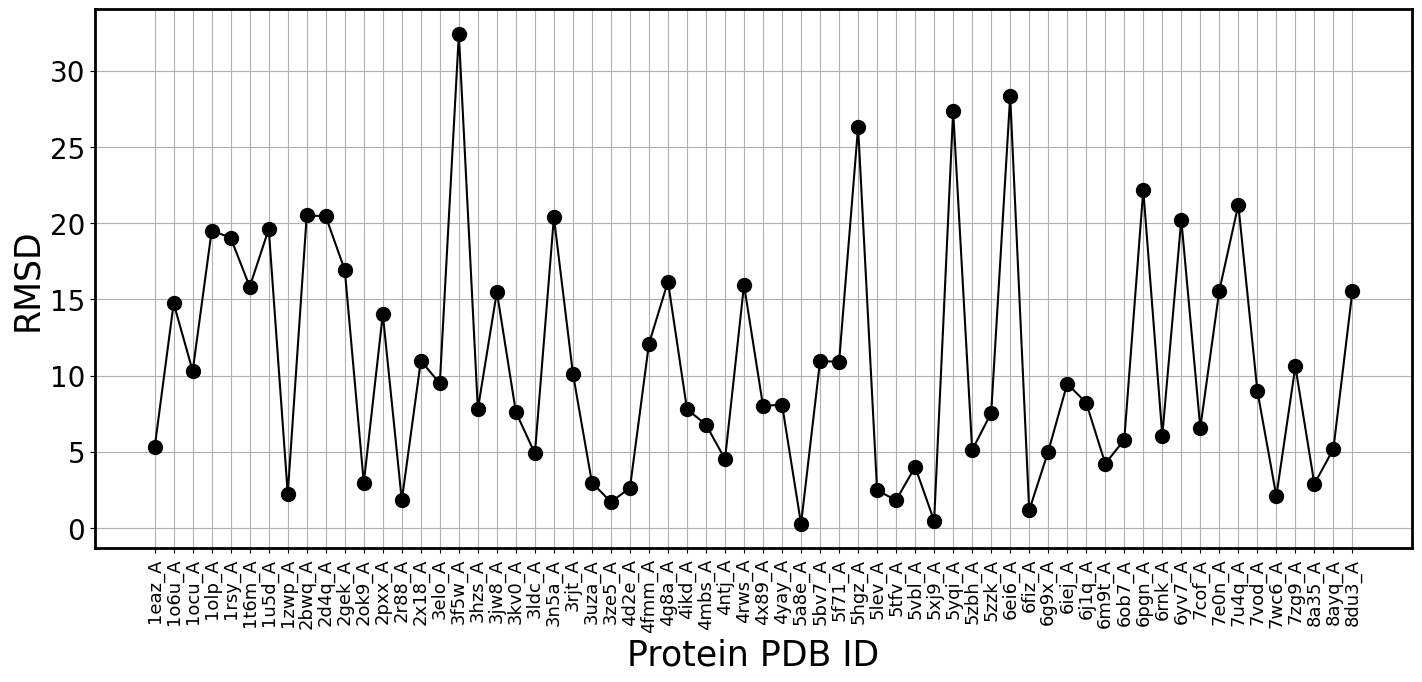

In [85]:
X=df["PDB ID"]
Y=df["RMSD"]

# Plot
plt.plot(X, Y, marker="o", markersize=10, c='black')
    
plt.grid(True)
plt.xlabel("Protein PDB ID", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='x', rotation=90, labelsize=13)
plt.tick_params(axis='y', labelsize=20)
#plt.ylim(0, 1.02)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/rmsd.png", format='png',bbox_inches='tight')

## Plot the Depth with Scatter

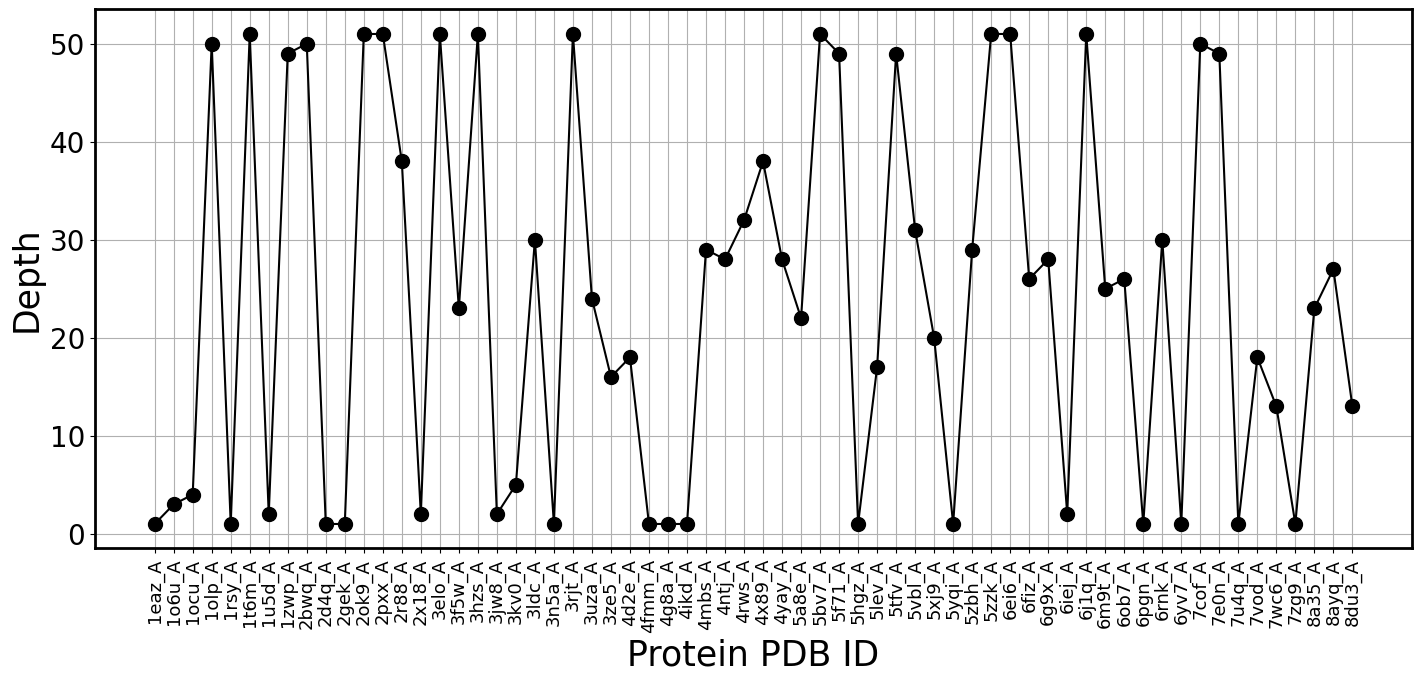

In [86]:
X=df["PDB ID"]
Y=df["Depth"]

# Plot
plt.plot(X, Y, marker="o", markersize=10, c='black')
    
plt.grid(True)
plt.xlabel("Protein PDB ID", fontsize=25)
plt.ylabel("Depth", fontsize=25)
plt.tick_params(axis='x', rotation=90, labelsize=13)
plt.tick_params(axis='y', labelsize=20)
#plt.ylim(0, 1.02)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/depth.png", format='png',bbox_inches='tight')

## Plot the Tilt with Scatter

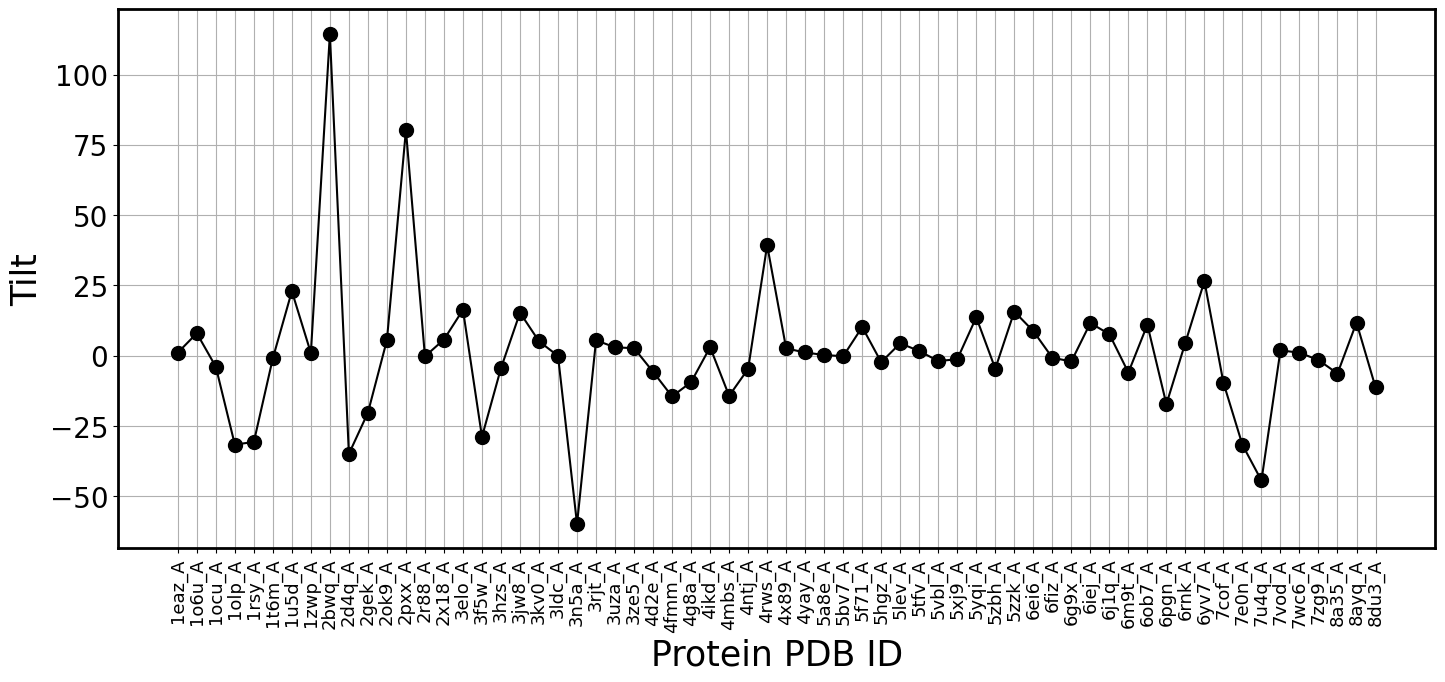

In [87]:
X=df["PDB ID"]
Y=df["Tilt"]

# Plot
plt.plot(X, Y, marker="o", markersize=10, c='black')
    
plt.grid(True)
plt.xlabel("Protein PDB ID", fontsize=25)
plt.ylabel("Tilt", fontsize=25)
plt.tick_params(axis='x', rotation=90, labelsize=13)
plt.tick_params(axis='y', labelsize=20)
#plt.ylim(0, 1.02)
.6128408297964585
➜  amphiscan-pep-spin 


# Save figure
plt.savefig("/home/cadeniran/ipn/figs/tilt.png", format='png',bbox_inches='tight')

## Plot the Score with Scatter

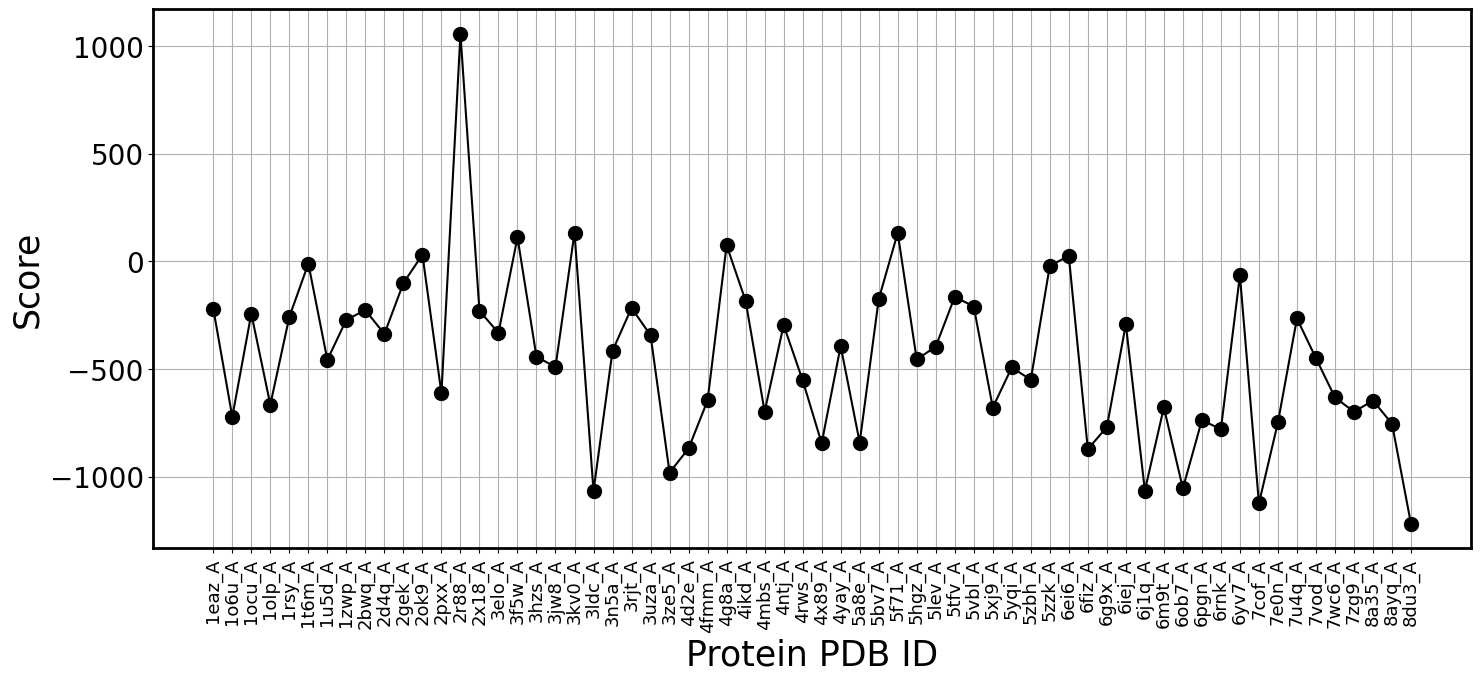

In [88]:
X=df["PDB ID"]
Y=df["Score"]

# Plot
plt.plot(X, Y, marker="o", markersize=10, c='black')
    
plt.grid(True)
plt.xlabel("Protein PDB ID", fontsize=25)
plt.ylabel("Score", fontsize=25)
plt.tick_params(axis='x', rotation=90, labelsize=13)
plt.tick_params(axis='y', labelsize=20)
#plt.ylim(0, 1.02)

# Save figure
plt.savefig("/home/cadeniran/ipn/figs/score.png", format='png',bbox_inches='tight')